# Comparación de modelos MLP y CNN sobre el dataset MNIST
En este notebook se entrena y compara un modelo MLP y un modelo CNN utilizando exactamente el mismo dataset MNIST. El objetivo es observar cómo cambia el rendimiento al modificar únicamente la arquitectura de la red neuronal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Cargar datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Preprocesamiento para MLP
x_train_mlp = x_train.reshape(-1, 784).astype('float32') / 255
x_test_mlp = x_test.reshape(-1, 784).astype('float32') / 255
# Preprocesamiento para CNN
x_train_cnn = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test_cnn = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# One-hot encoding
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# Modelo MLP
model_mlp = Sequential()
model_mlp.add(Dense(256, activation='relu', input_shape=(784,)))
model_mlp.add(Dropout(0.3))
model_mlp.add(Dense(256, activation='relu'))
model_mlp.add(Dropout(0.3))
model_mlp.add(Dense(num_classes, activation='softmax'))

model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_mlp = model_mlp.fit(x_train_mlp, y_train_cat, validation_data=(x_test_mlp, y_test_cat), epochs=10, batch_size=128, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# Modelo CNN
model_cnn = Sequential()
model_cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.3))
model_cnn.add(Dense(num_classes, activation='softmax'))

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_cnn = model_cnn.fit(x_train_cnn, y_train_cat, validation_data=(x_test_cnn, y_test_cat), epochs=10, batch_size=128, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


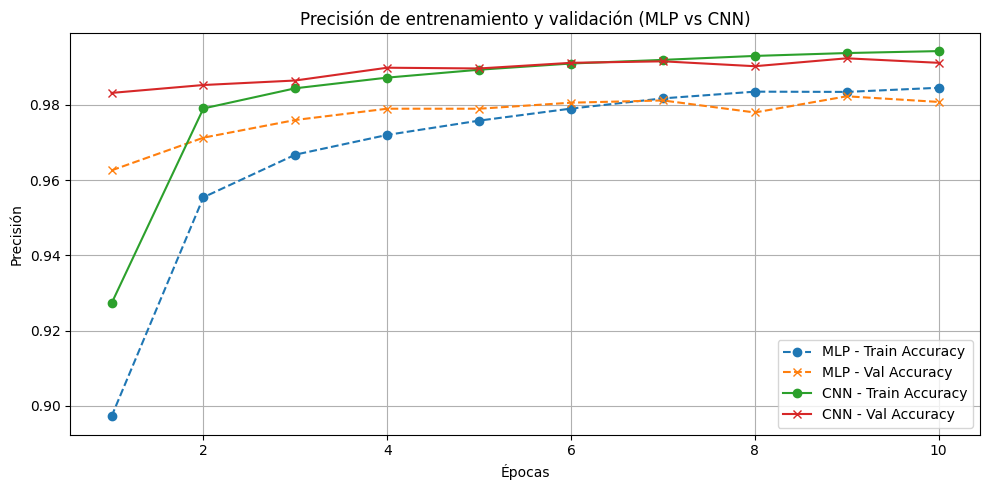

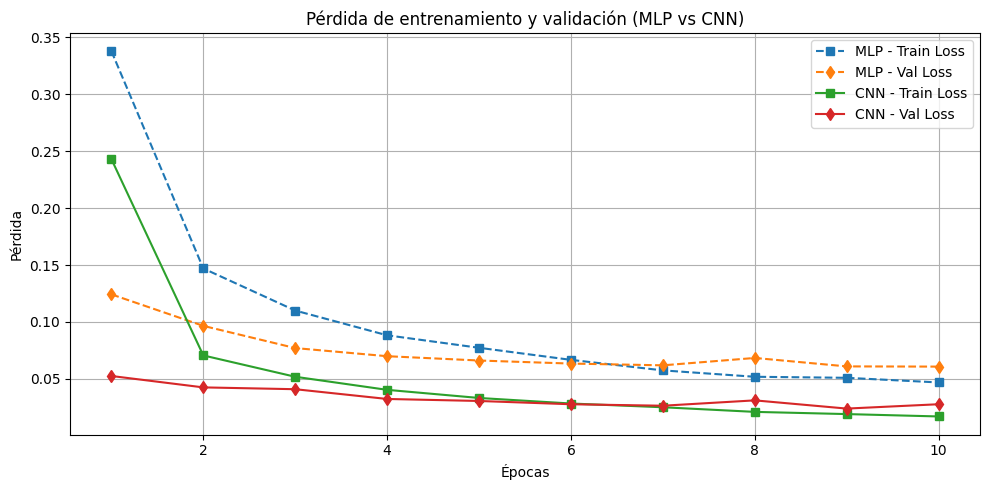

In [5]:
import matplotlib.pyplot as plt

epochs = range(1, len(history_mlp.history['accuracy']) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, history_mlp.history['accuracy'], label='MLP - Train Accuracy', linestyle='--', marker='o')
plt.plot(epochs, history_mlp.history['val_accuracy'], label='MLP - Val Accuracy', linestyle='--', marker='x')
plt.plot(epochs, history_cnn.history['accuracy'], label='CNN - Train Accuracy', linestyle='-', marker='o')
plt.plot(epochs, history_cnn.history['val_accuracy'], label='CNN - Val Accuracy', linestyle='-', marker='x')
plt.title('Precisión de entrenamiento y validación (MLP vs CNN)')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(epochs, history_mlp.history['loss'], label='MLP - Train Loss', linestyle='--', marker='s')
plt.plot(epochs, history_mlp.history['val_loss'], label='MLP - Val Loss', linestyle='--', marker='d')
plt.plot(epochs, history_cnn.history['loss'], label='CNN - Train Loss', linestyle='-', marker='s')
plt.plot(epochs, history_cnn.history['val_loss'], label='CNN - Val Loss', linestyle='-', marker='d')
plt.title('Pérdida de entrenamiento y validación (MLP vs CNN)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
